# Module 4, Assignment 3: Market Segmentation For Airlines
Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set.

In this problem, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers.

The file AirlinesCluster.csv contains information on 3,999 members of the frequent flyer program. This data comes from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce. For more information, see the website for the book.

There are seven different variables in the dataset, described below:


*   **Balance** = number of miles eligible for award travel
*   **QualMiles** = number of miles qualifying for TopFlight status
*   **BonusMiles**= number of miles earned from non-flight bonus transactions in the past 12 months
*   **BonusTrans** = number of non-flight bonus transactions in the past 12 months
*   **FlightMiles** = number of flight miles in the past 12 months
*   **FlightTrans** = number of flight transactions in the past 12 months
*   **DaysSinceEnroll** = number of days since enrolled in the frequent flyer program

# Part 1: Normalizing the Data

We first read the dataset AirlinesCluster.csv into Python and call it "airlines".

We also plot the summaries of the different variables.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

np.random.seed(42)


# Load Data
airlines = pd.read_csv("AirlinesCluster.csv")
print(airlines.describe())

            Balance     QualMiles     BonusMiles  BonusTrans   FlightMiles  \
count  3.999000e+03   3999.000000    3999.000000  3999.00000   3999.000000   
mean   7.360133e+04    144.114529   17144.846212    11.60190    460.055764   
std    1.007757e+05    773.663804   24150.967826     9.60381   1400.209171   
min    0.000000e+00      0.000000       0.000000     0.00000      0.000000   
25%    1.852750e+04      0.000000    1250.000000     3.00000      0.000000   
50%    4.309700e+04      0.000000    7171.000000    12.00000      0.000000   
75%    9.240400e+04      0.000000   23800.500000    17.00000    311.000000   
max    1.704838e+06  11148.000000  263685.000000    86.00000  30817.000000   

       FlightTrans  DaysSinceEnroll  
count  3999.000000       3999.00000  
mean      1.373593       4118.55939  
std       3.793172       2065.13454  
min       0.000000          2.00000  
25%       0.000000       2330.00000  
50%       0.000000       4096.00000  
75%       1.000000       5790.5

Let's go ahead and normalize our data and create a normalized data frame called "airlinesNorm".

If you look at the summary of airlinesNorm, you should see that all of the variables now have mean zero.

In [ ]:
# Normalize Data
airlines_norm = (airlines - airlines.mean()) / airlines.std()

We now display the maximum and the minimum values of the different variables.

In [ ]:
airlines_norm.max(axis=0)

,0
Balance,16.186811
QualMiles,14.223084
BonusMiles,10.208293
BonusTrans,7.746727
FlightMiles,21.680292
FlightTrans,13.610351
DaysSinceEnroll,2.022842


In [ ]:
airlines_norm.min(axis=0)

,0
Balance,-0.730348
QualMiles,-0.186275
BonusMiles,-0.709903
BonusTrans,-1.208052
FlightMiles,-0.328562
FlightTrans,-0.362123
DaysSinceEnroll,-1.993361


## Part 2: Hierarchical Clustering

The next step is to perform hierarchical clustering. We compute the distances between data points (using euclidean distance) and then we run the Hierarchical clustering algorithm on the normalized data. It may take a few minutes for the commands to finish since the dataset has a large number of observations for hierarchical clustering.



In [ ]:
# Hierarchical Clustering
airline_dist = pdist(airlines_norm, metric="euclidean")
airline_dist = np.round(airline_dist, 7)

from scipy.spatial.distance import squareform
linkage_matrix = linkage(airline_dist, method="ward")

We now plot the dendrogram of the resulting clustering.

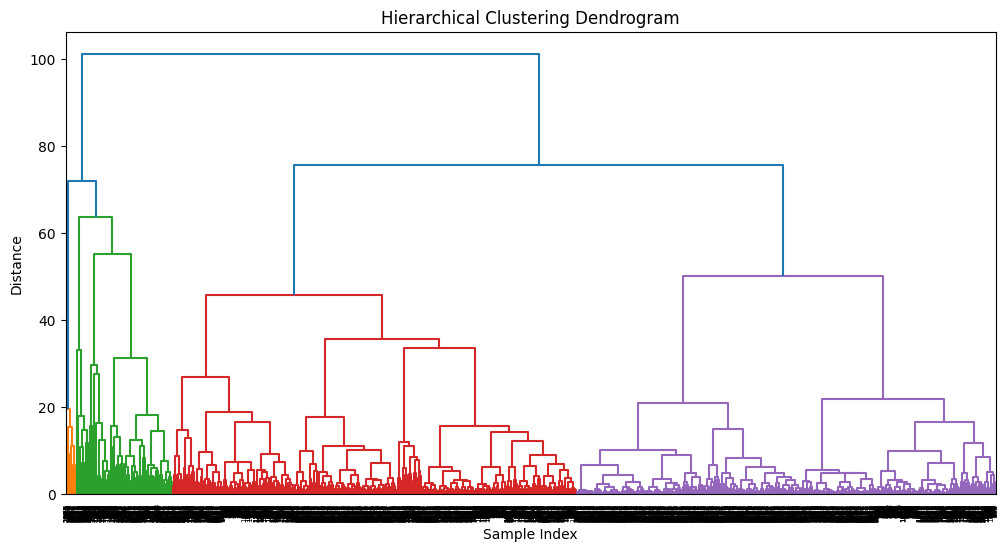

In [ ]:
# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

We now compare the average values in each of the variables for the 5 clusters (the centroids of the clusters). We compute the average values of the unnormalized data, so that it is easier to interpret.

In [ ]:
# Cut Tree into Clusters
cluster_groups = fcluster(linkage_matrix, 5, criterion='maxclust')

In [ ]:
# Compute Cluster Means
cluster_df = pd.DataFrame(airlines, index=range(len(airlines)))
cluster_df["Cluster"] = cluster_groups
cluster_means = cluster_df.groupby("Cluster").mean()
print(cluster_means)


               Balance    QualMiles    BonusMiles  BonusTrans  FlightMiles  \
Cluster                                                                      
1        135318.020833  5870.062500  16406.000000   12.645833   974.770833   
2        154830.603774   490.716981  32137.018868   33.471698  8752.622642   
3        204316.227778   144.711111  36265.022222   19.802778  2286.719444   
4         79910.013241   123.694876  26735.156592   16.832470   148.672424   
5         37353.074403     0.882288   3651.923931    4.246530   137.491394   

         FlightTrans  DaysSinceEnroll  
Cluster                                
1           3.270833      4320.375000  
2          23.679245      4046.830189  
3           6.744444      4744.158333  
4           0.483592      4727.468048  
5           0.451416      3402.970572  


## Part 3: K-Means Clustering

Now, we run the k-means clustering algorithm on the normalized data, again creating 5 clusters. We set the seed to 88 right before running the clustering algorithm, and set the argument max_iter to 1000.


In [ ]:
# K-Means Clustering
np.random.seed(88)
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=88)
kmeans.fit(airlines_norm)
print(pd.Series(kmeans.labels_).value_counts())

1    1656
0    1384
4     764
2     138
3      57
Name: count, dtype: int64


## Problem 3.2 - K-Means Clustering

Now, we compare the cluster centroids to each other either by dividing the data points into groups, or by looking at the output of cluster_centers_. (Note that the output of cluster_centers_ will be for the normalized data. If you want to look at the average values for the unnormalized data, you need to look at the original data like we did for hierarchical clustering.)



In [ ]:
# K-Means Cluster Centers
print(pd.DataFrame(kmeans.cluster_centers_, columns=airlines.columns))

    Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0 -0.160773  -0.115719   -0.337711   -0.248536    -0.176737    -0.193026   
1 -0.352850  -0.140702   -0.427833   -0.409779    -0.200867    -0.216369   
2  0.982400   0.371123    0.634051    1.766311     3.862209     4.134897   
3  0.400998   6.978766    0.084959    0.072507     0.342603     0.382521   
4  0.849765  -0.073076    1.420431    1.015427     0.032606     0.043518   

   DaysSinceEnroll  
0         0.821740  
1        -0.888292  
2         0.245104  
3        -0.119306  
4         0.398647  


In the final step, we use the cluster labels from the k-means algorithm as the target variable in a Decision Tree model.
By visualizing the tree, we can examine the splits that define each cluster and understand which features most strongly distinguish them.
This allows us to translate abstract numerical clusters into clear, interpretable customer profiles.



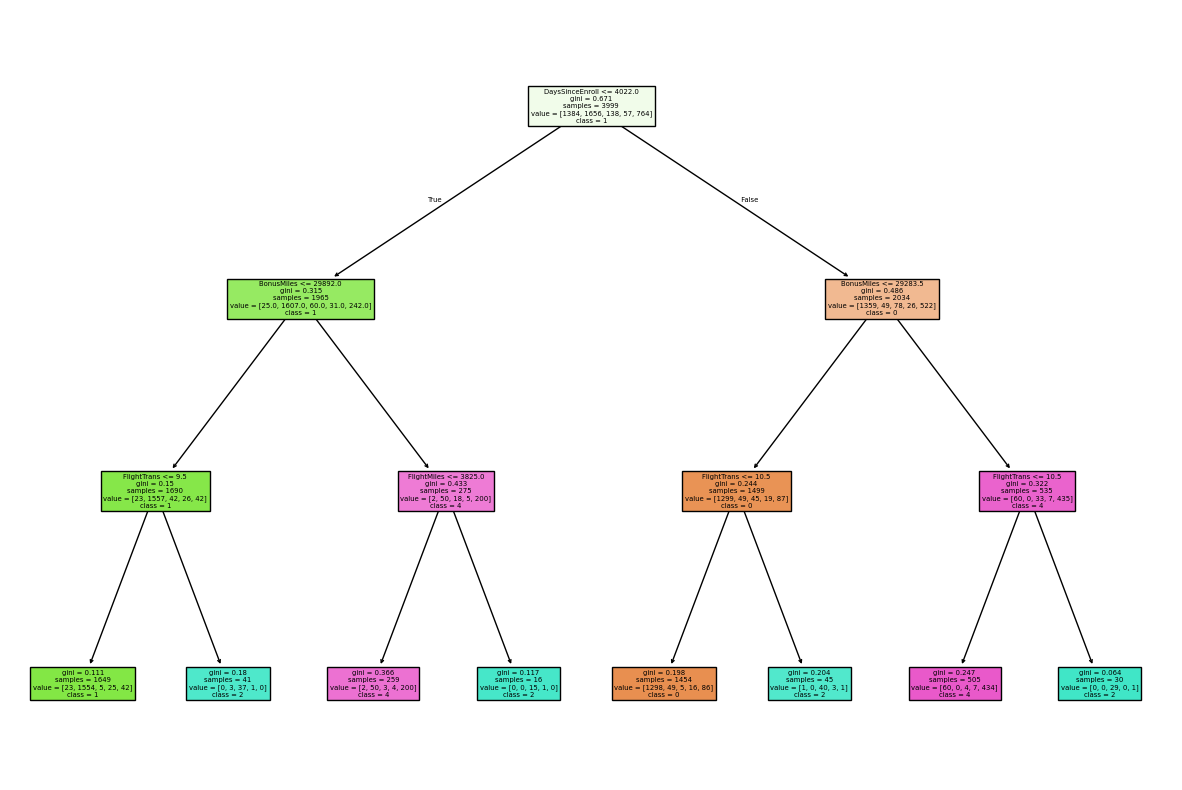

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Train a Decision Tree (CART)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Small tree for visualization

# We don't need to use the normalized data to train the tree
tree.fit(airlines, kmeans.labels_)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=airlines.columns.tolist(), class_names=[str(i) for i in range(5)])
plt.show()

We can also print the training accuracy of the tree, by comparing the predictions it makes with the ground-truth clustering labels.

In [ ]:
y_pred = tree.predict(airlines)
accuracy_score(kmeans.labels_, y_pred)

0.9019754938734683